In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_ga_run(csv_path, run_label=None, save=False):
    # Style and font config for professional plots
    plt.style.use("seaborn-v0_8-whitegrid")
    plt.rcParams.update({
        "font.size": 13,
        "axes.labelsize": 14,
        "axes.titlesize": 15,
        "legend.fontsize": 11,
        "figure.dpi": 150,
        "axes.edgecolor": "#222222",
        "axes.linewidth": 1.2,
        "axes.grid": True,
        "grid.alpha": 0.18,
        "xtick.direction": "out",
        "ytick.direction": "out"
    })

    df = pd.read_csv(csv_path)
    if run_label is None:
        run_label = csv_path.split("/")[-2]

    # Use constrained_layout for clean, warning-free grid
    fig, axs = plt.subplots(2, 3, figsize=(16, 10), constrained_layout=True)
    fig.suptitle(f"GA Training Summary — {run_label}", fontsize=18, fontweight='bold', y=1.02)

    # 1. Fitness Progress
    axs[0, 0].plot(df["Generation"], df["BestFitness"], label="Best Fitness", color="#1752a6", lw=2)
    axs[0, 0].plot(df["Generation"], df["AvgFitness"], label="Average Fitness", color="#d18300", lw=1.7, linestyle="--")
    axs[0, 0].plot(df["Generation"], df["WorstFitness"], label="Worst Fitness", color="#c02d2d", lw=1, linestyle=":")
    axs[0, 0].set_xlabel("Generation")
    axs[0, 0].set_ylabel("Fitness")
    axs[0, 0].set_title("Fitness Progress")
    axs[0, 0].legend(loc="best", frameon=True)
    axs[0, 0].spines['top'].set_visible(False)
    axs[0, 0].spines['right'].set_visible(False)

    # 2. Fitness Std Dev
    axs[0, 1].plot(df["Generation"], df["FitnessStd"], label="Fitness Std. Dev.", color="#735da5", lw=2)
    axs[0, 1].set_xlabel("Generation")
    axs[0, 1].set_ylabel("Std. Dev.")
    axs[0, 1].set_title("Fitness Std. Deviation")
    axs[0, 1].legend(loc="best", frameon=True)
    axs[0, 1].spines['top'].set_visible(False)
    axs[0, 1].spines['right'].set_visible(False)

    # 3. Best Score (skip if not present)
    if "BestScore" in df.columns:
        axs[0, 2].plot(df["Generation"], df["BestScore"], color="#2b6e3a", lw=2)
        axs[0, 2].set_title("Best Agent Score")
        axs[0, 2].set_xlabel("Generation")
        axs[0, 2].set_ylabel("Score")
        axs[0, 2].spines['top'].set_visible(False)
        axs[0, 2].spines['right'].set_visible(False)
    else:
        axs[0, 2].set_title("No Score Data")
        axs[0, 2].axis('off')

    # 4. Best Lines (skip if not present)
    if "BestLines" in df.columns:
        axs[1, 0].plot(df["Generation"], df["BestLines"], color="#ba5d12", lw=2)
        axs[1, 0].set_title("Best Agent Lines Cleared")
        axs[1, 0].set_xlabel("Generation")
        axs[1, 0].set_ylabel("Lines")
        axs[1, 0].spines['top'].set_visible(False)
        axs[1, 0].spines['right'].set_visible(False)
    else:
        axs[1, 0].set_title("No Lines Data")
        axs[1, 0].axis('off')

    # 5. NumTetris (skip if not present)
    if "NumTetris" in df.columns:
        axs[1, 1].plot(df["Generation"], df["NumTetris"], color="#c02d2d", lw=2)
        axs[1, 1].set_title("Best Agent Tetrises")
        axs[1, 1].set_xlabel("Generation")
        axs[1, 1].set_ylabel("Tetrises")
        axs[1, 1].spines['top'].set_visible(False)
        axs[1, 1].spines['right'].set_visible(False)
    else:
        axs[1, 1].set_title("No Tetris Data")
        axs[1, 1].axis('off')

    # 6. Heuristic Weights Evolution
    param_cols = [
        "W1:AggHeight", "W2:Holes", "W3:Blockades", "W4:Bumpiness", "W5:AlmostFull",
        "W6:FillsWell", "W7:ClearBonus4", "W8:ClearBonus3", "W9:ClearBonus2", "W10:ClearBonus1"
    ]
    # Use matplotlib.colormaps to avoid deprecation warnings
    param_colors = plt.colormaps["tab10"]
    for idx, col in enumerate(param_cols):
        if col in df.columns:
            axs[1, 2].plot(df["Generation"], df[col], label=col.replace(":", ": "), color=param_colors(idx), lw=1.3)
    axs[1, 2].set_xlabel("Generation")
    axs[1, 2].set_ylabel("Weight Value")
    axs[1, 2].set_title("Best Agent Heuristic Weights")
    axs[1, 2].legend(loc="upper right", fontsize=8, frameon=True, ncol=1)
    axs[1, 2].spines['top'].set_visible(False)
    axs[1, 2].spines['right'].set_visible(False)

    # Clean up all axes for consistency
    for ax in axs.flat:
        ax.tick_params(axis='both', which='major', labelsize=12)

    plt.show()

    if save:
        fig.savefig(f"{run_label}_GA_Report.png", bbox_inches="tight", dpi=300)
        print(f"Saved as {run_label}_GA_Report.png")

# Example usage:
# plot_ga_run("D:/Tetris-Project/results/GA/run_1/ga_log.csv", run_label="Run 1")


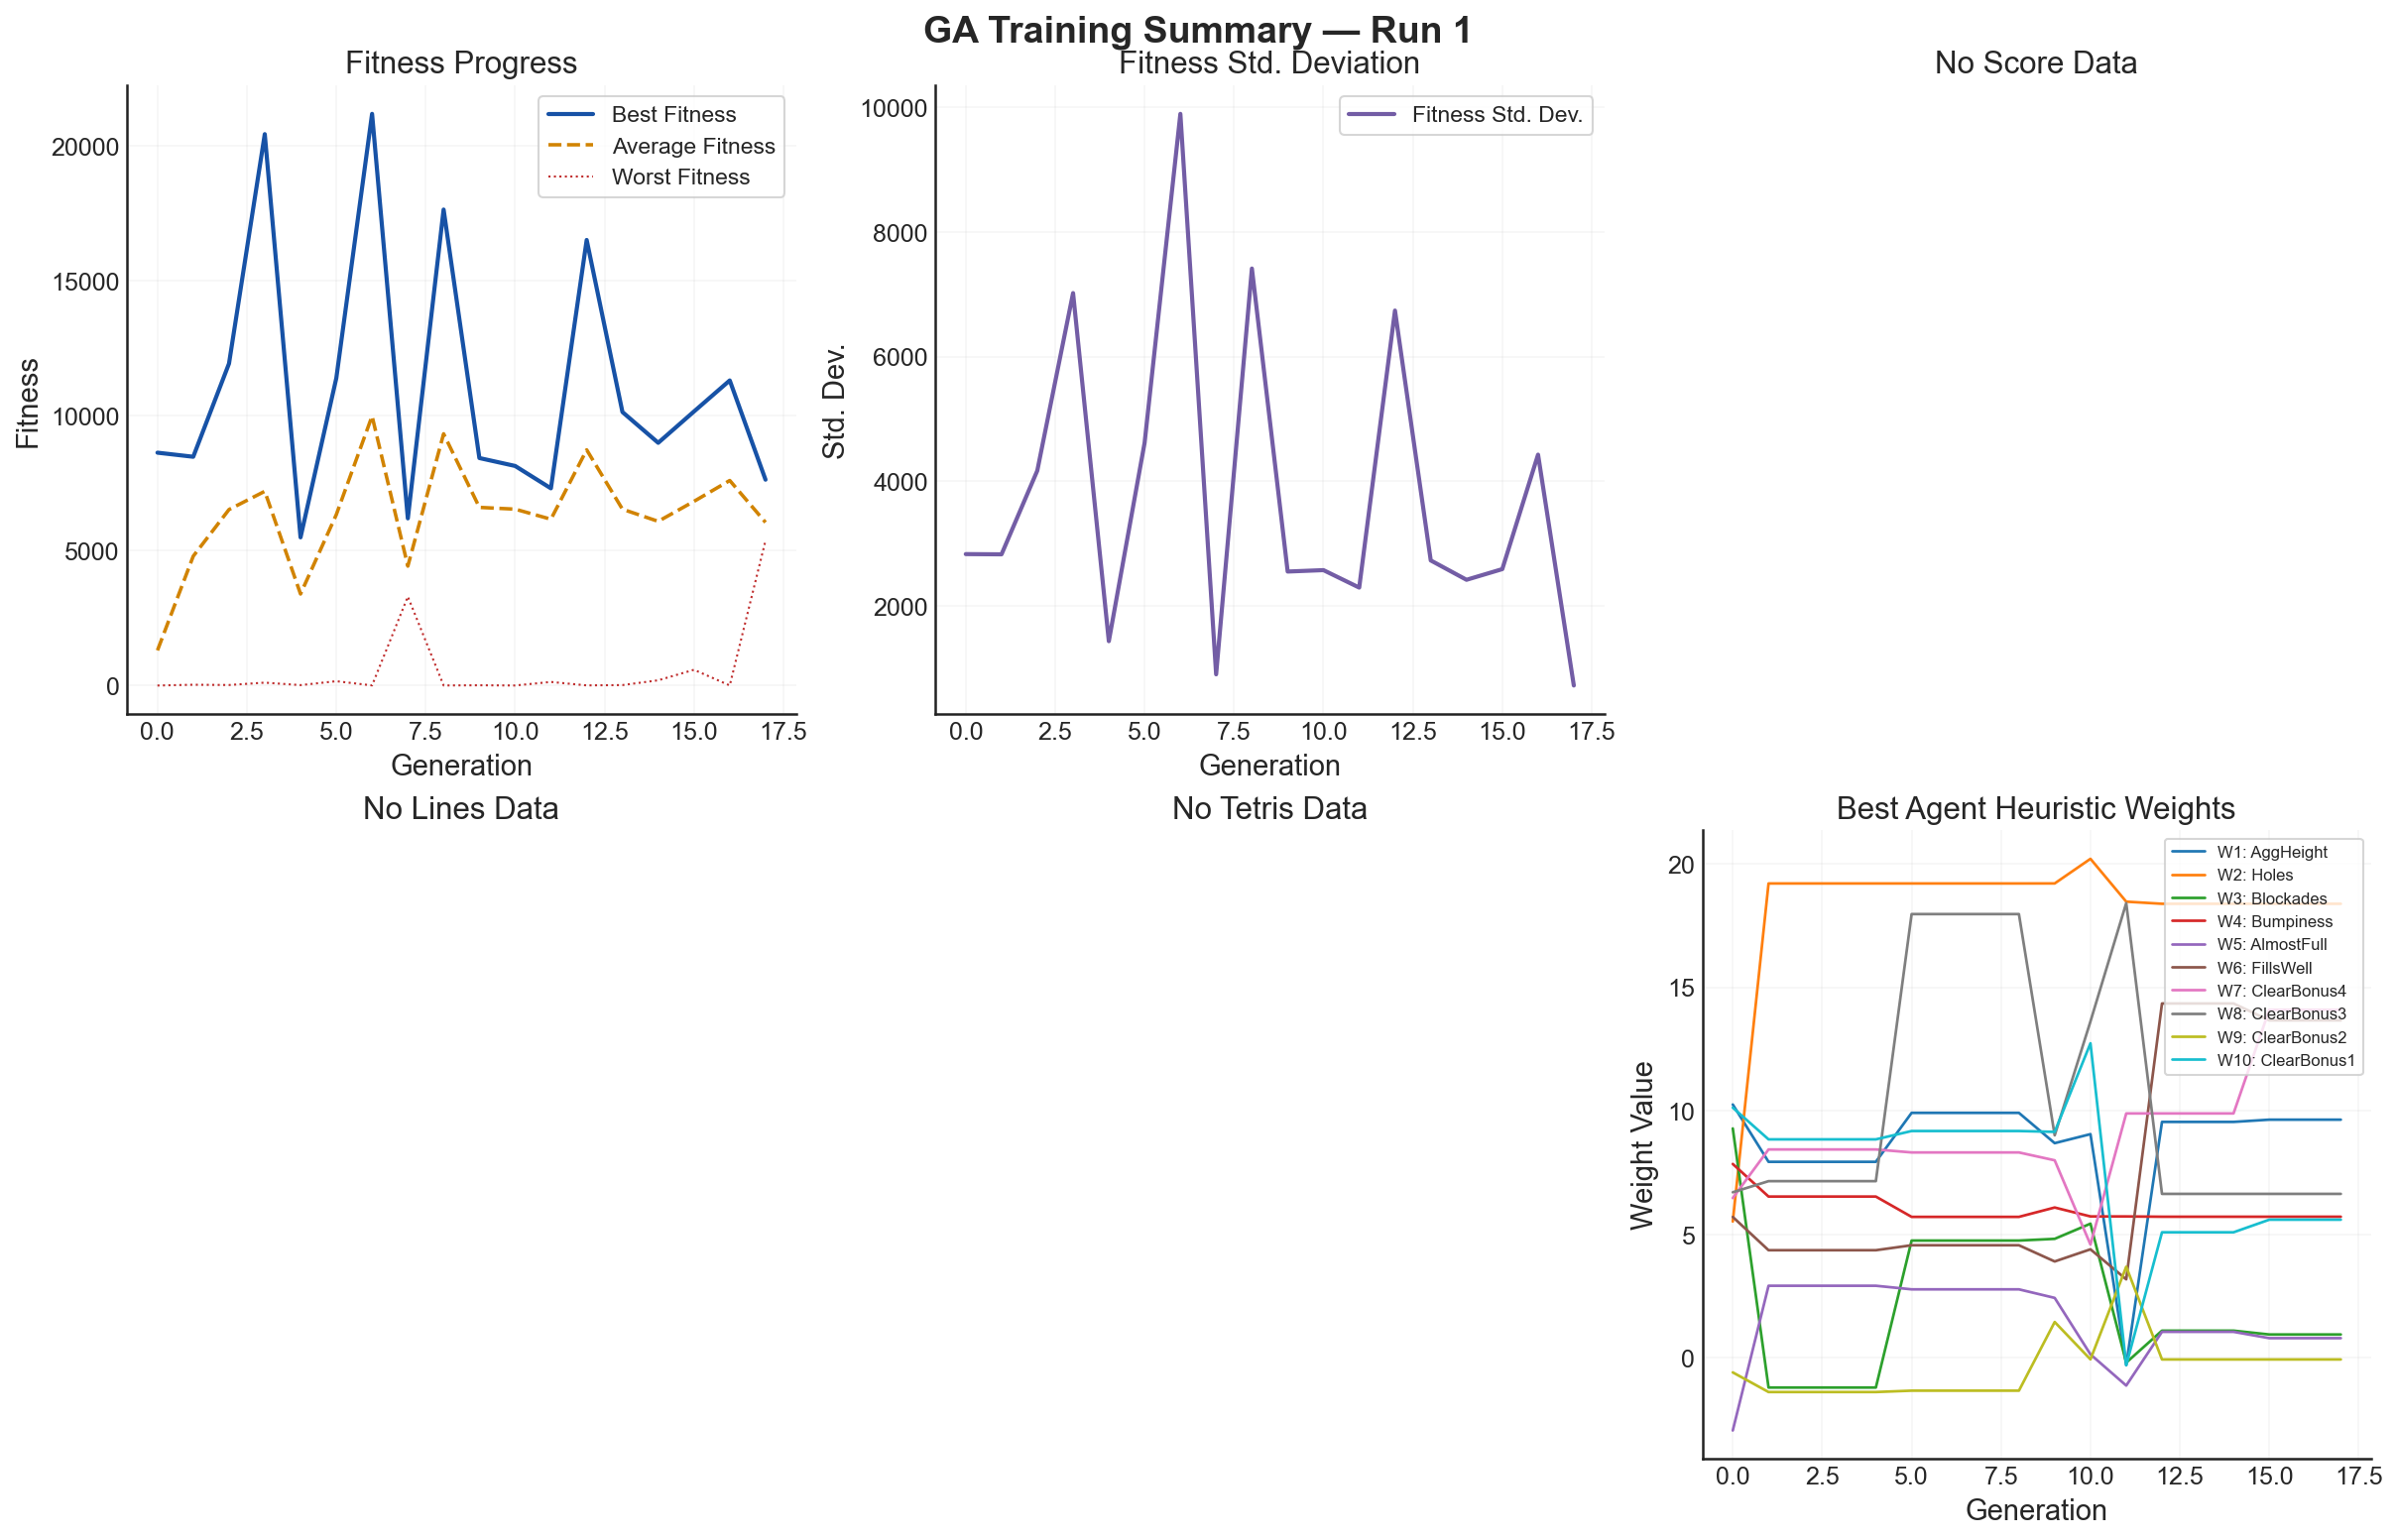

In [2]:
plot_ga_run("D:/Tetris-Project/results/GA/run_1/ga_log.csv", "Run 1")


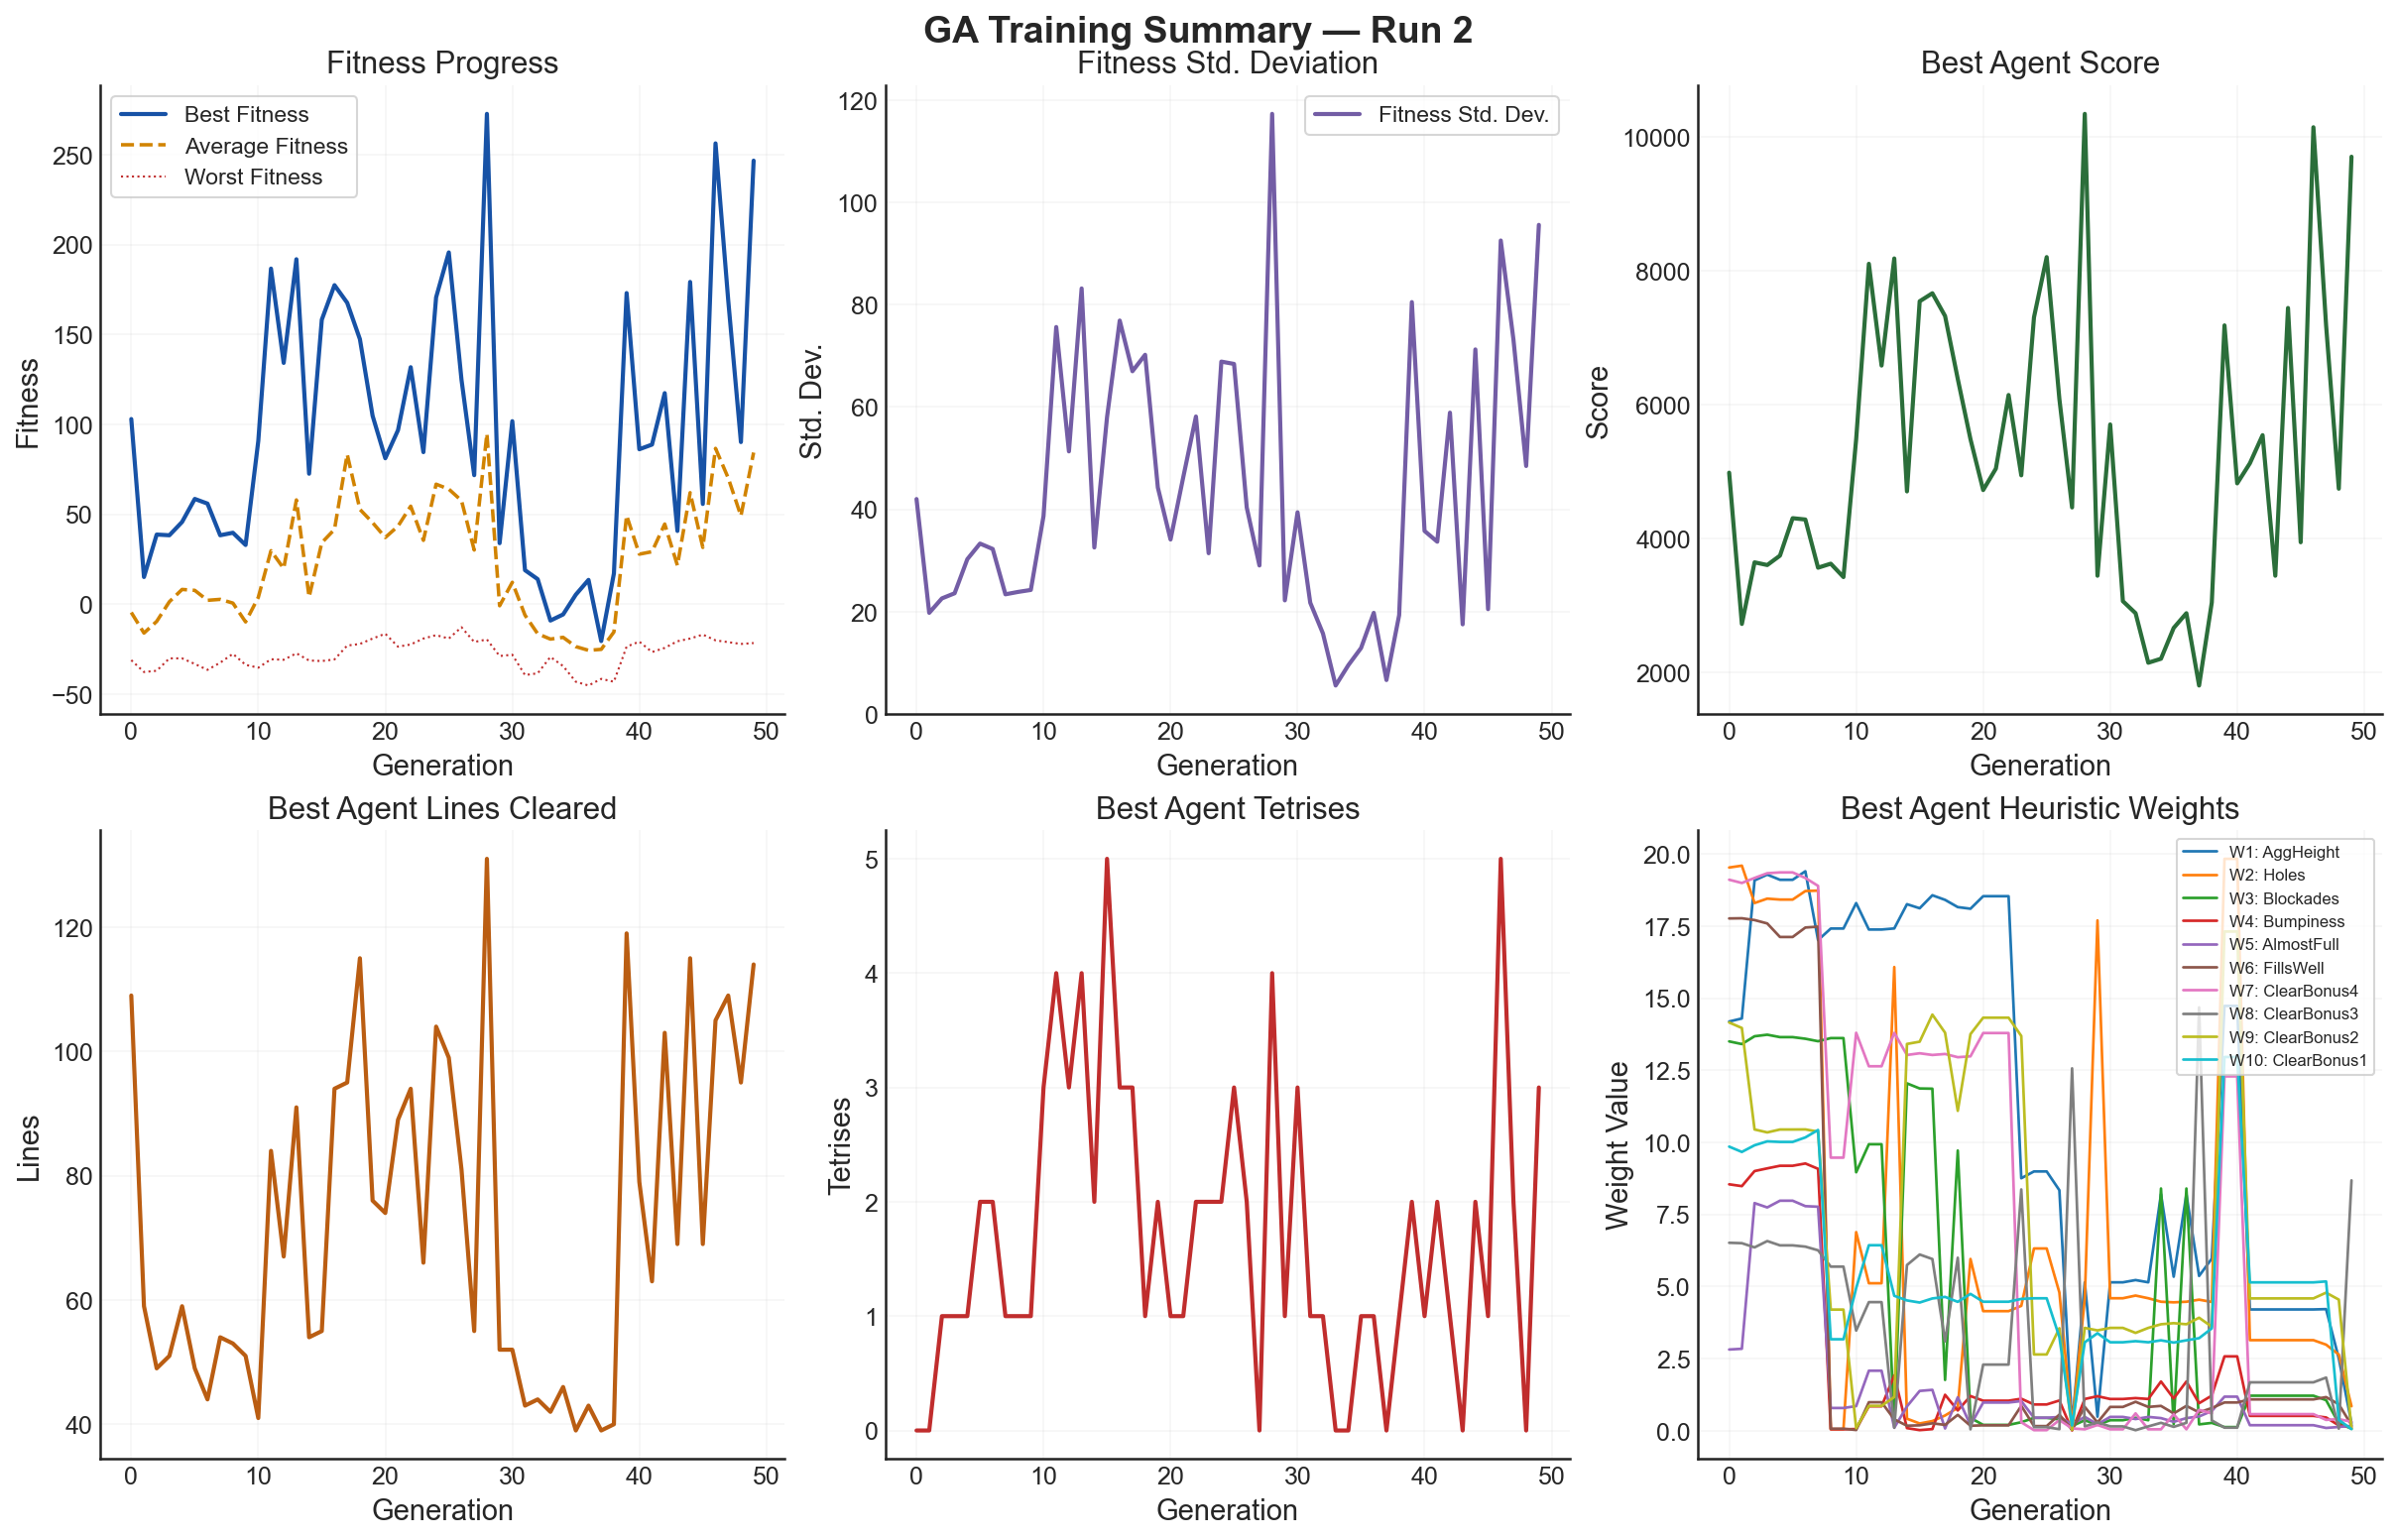

In [3]:
plot_ga_run("D:/Tetris-Project/results/GA/run_2/ga_log.csv", "Run 2")


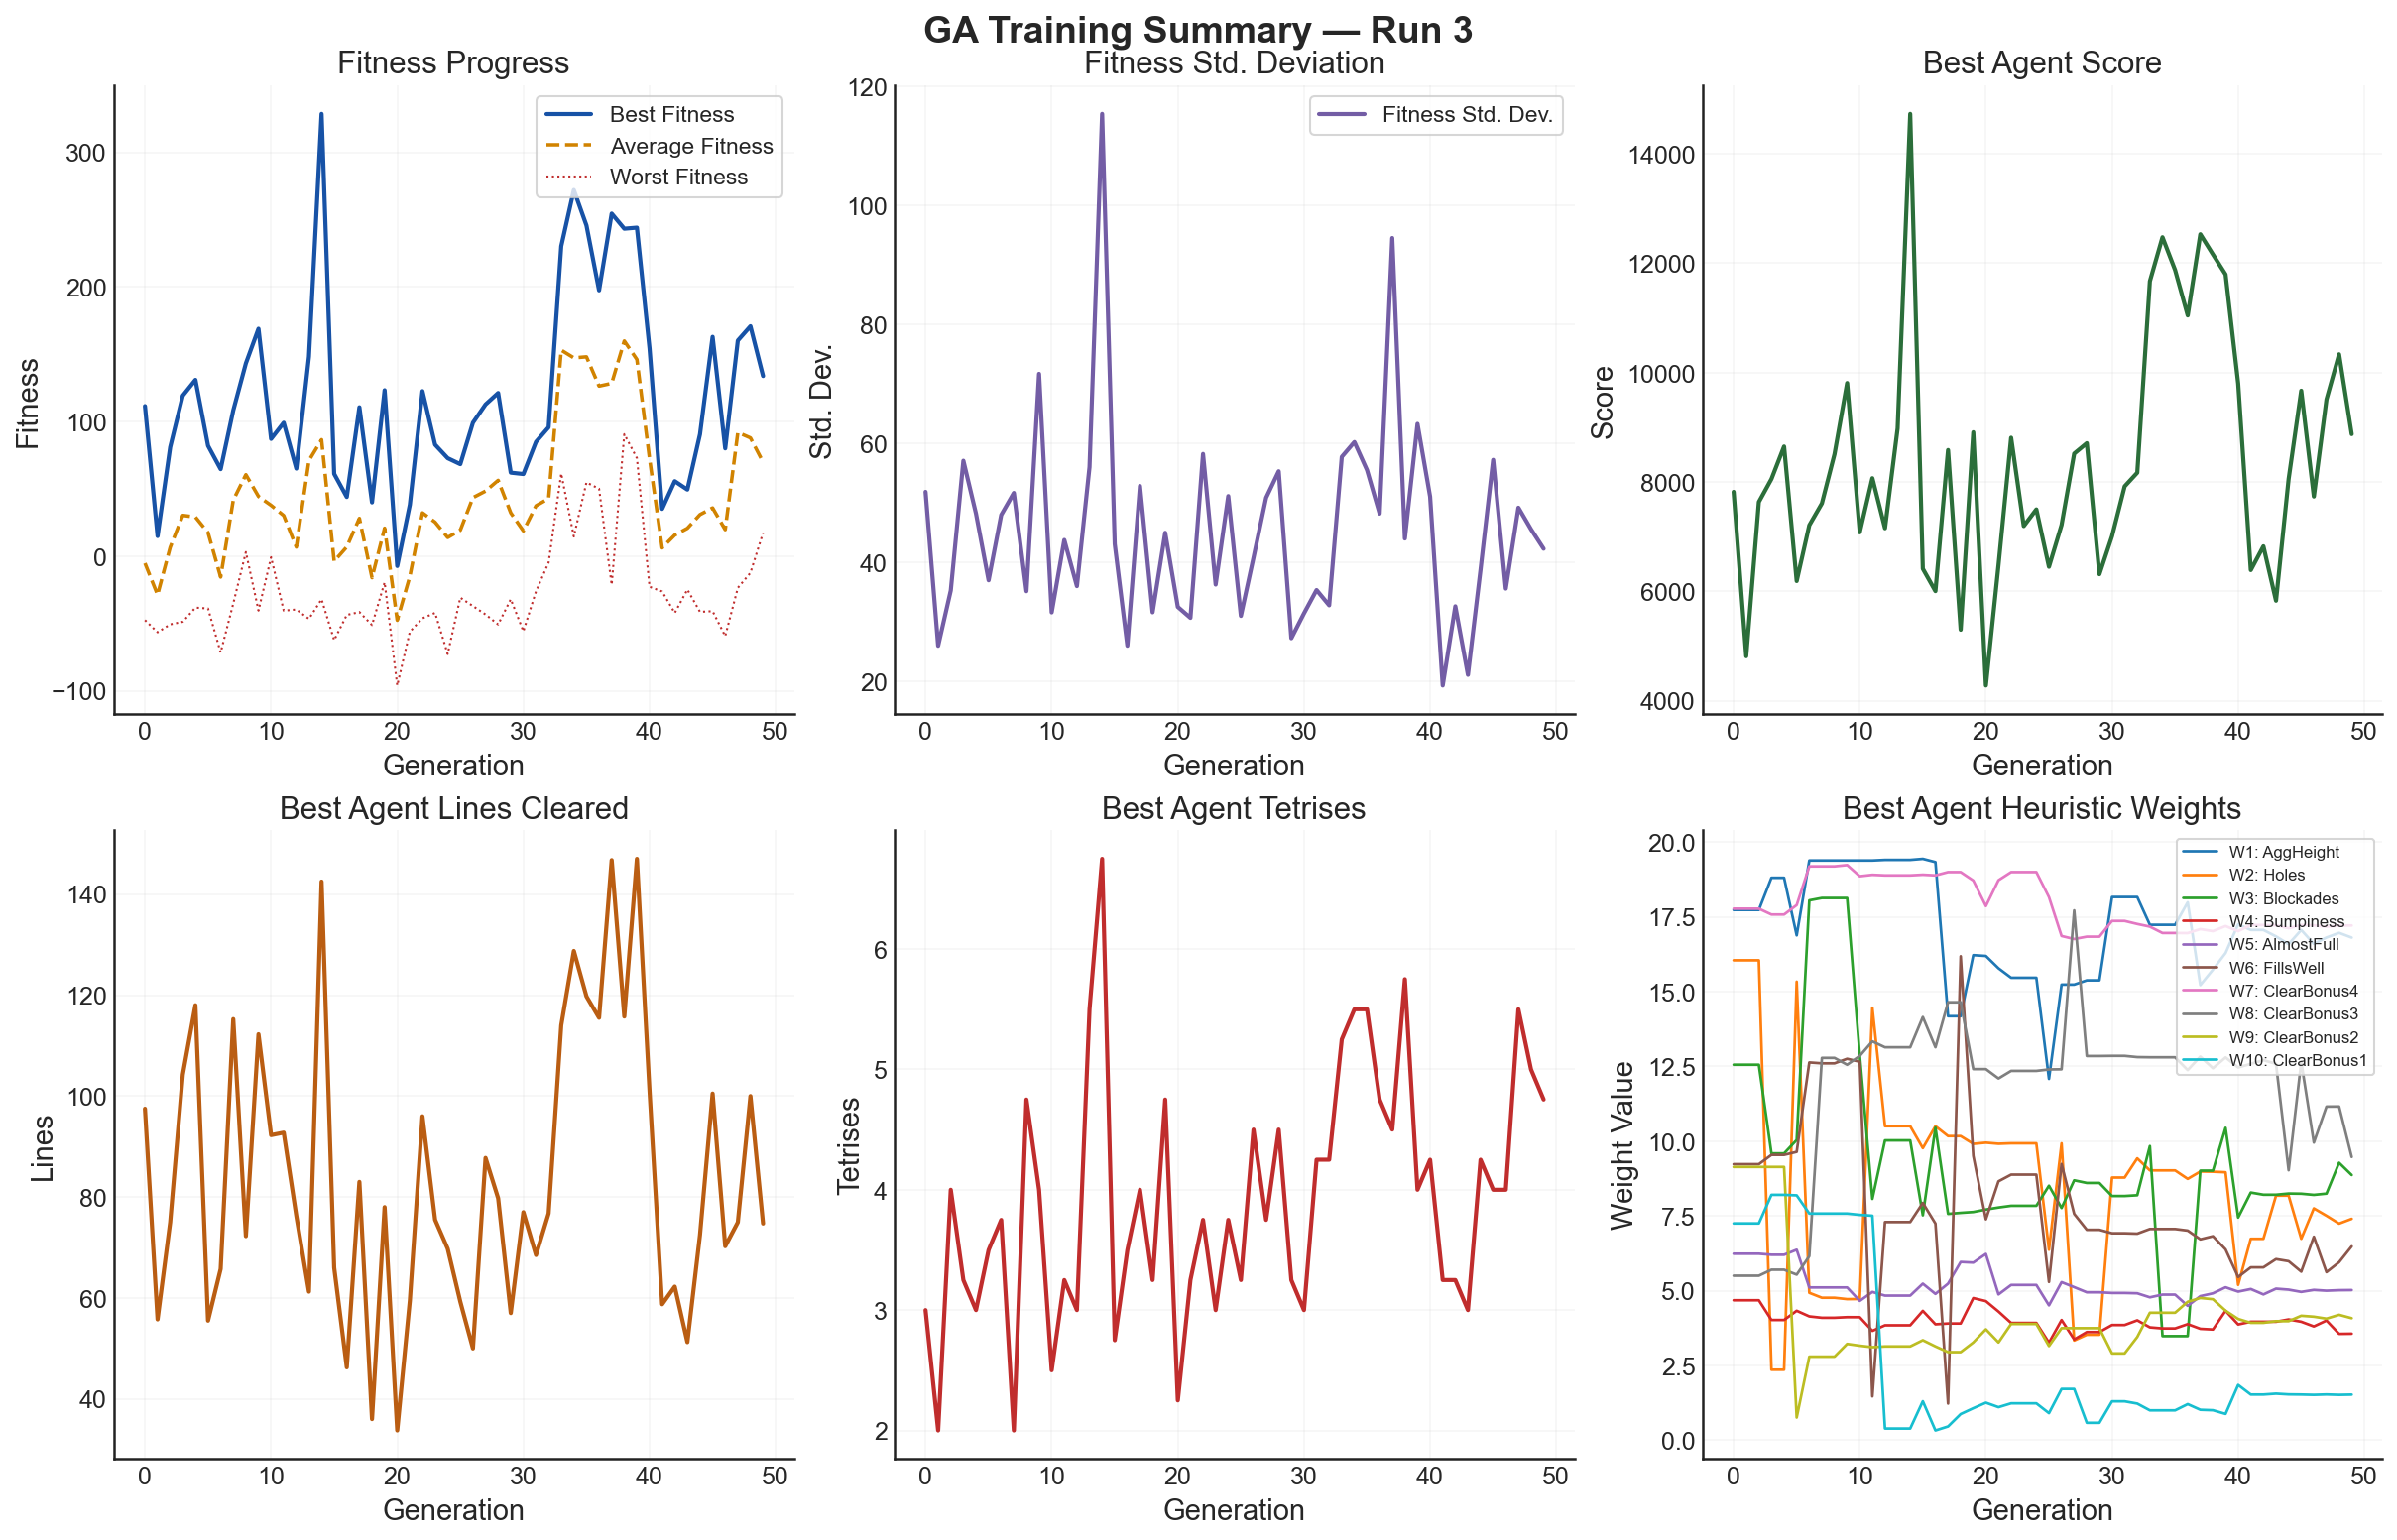

In [4]:
plot_ga_run("D:/Tetris-Project/results/GA/run_3/ga_log.csv", "Run 3")

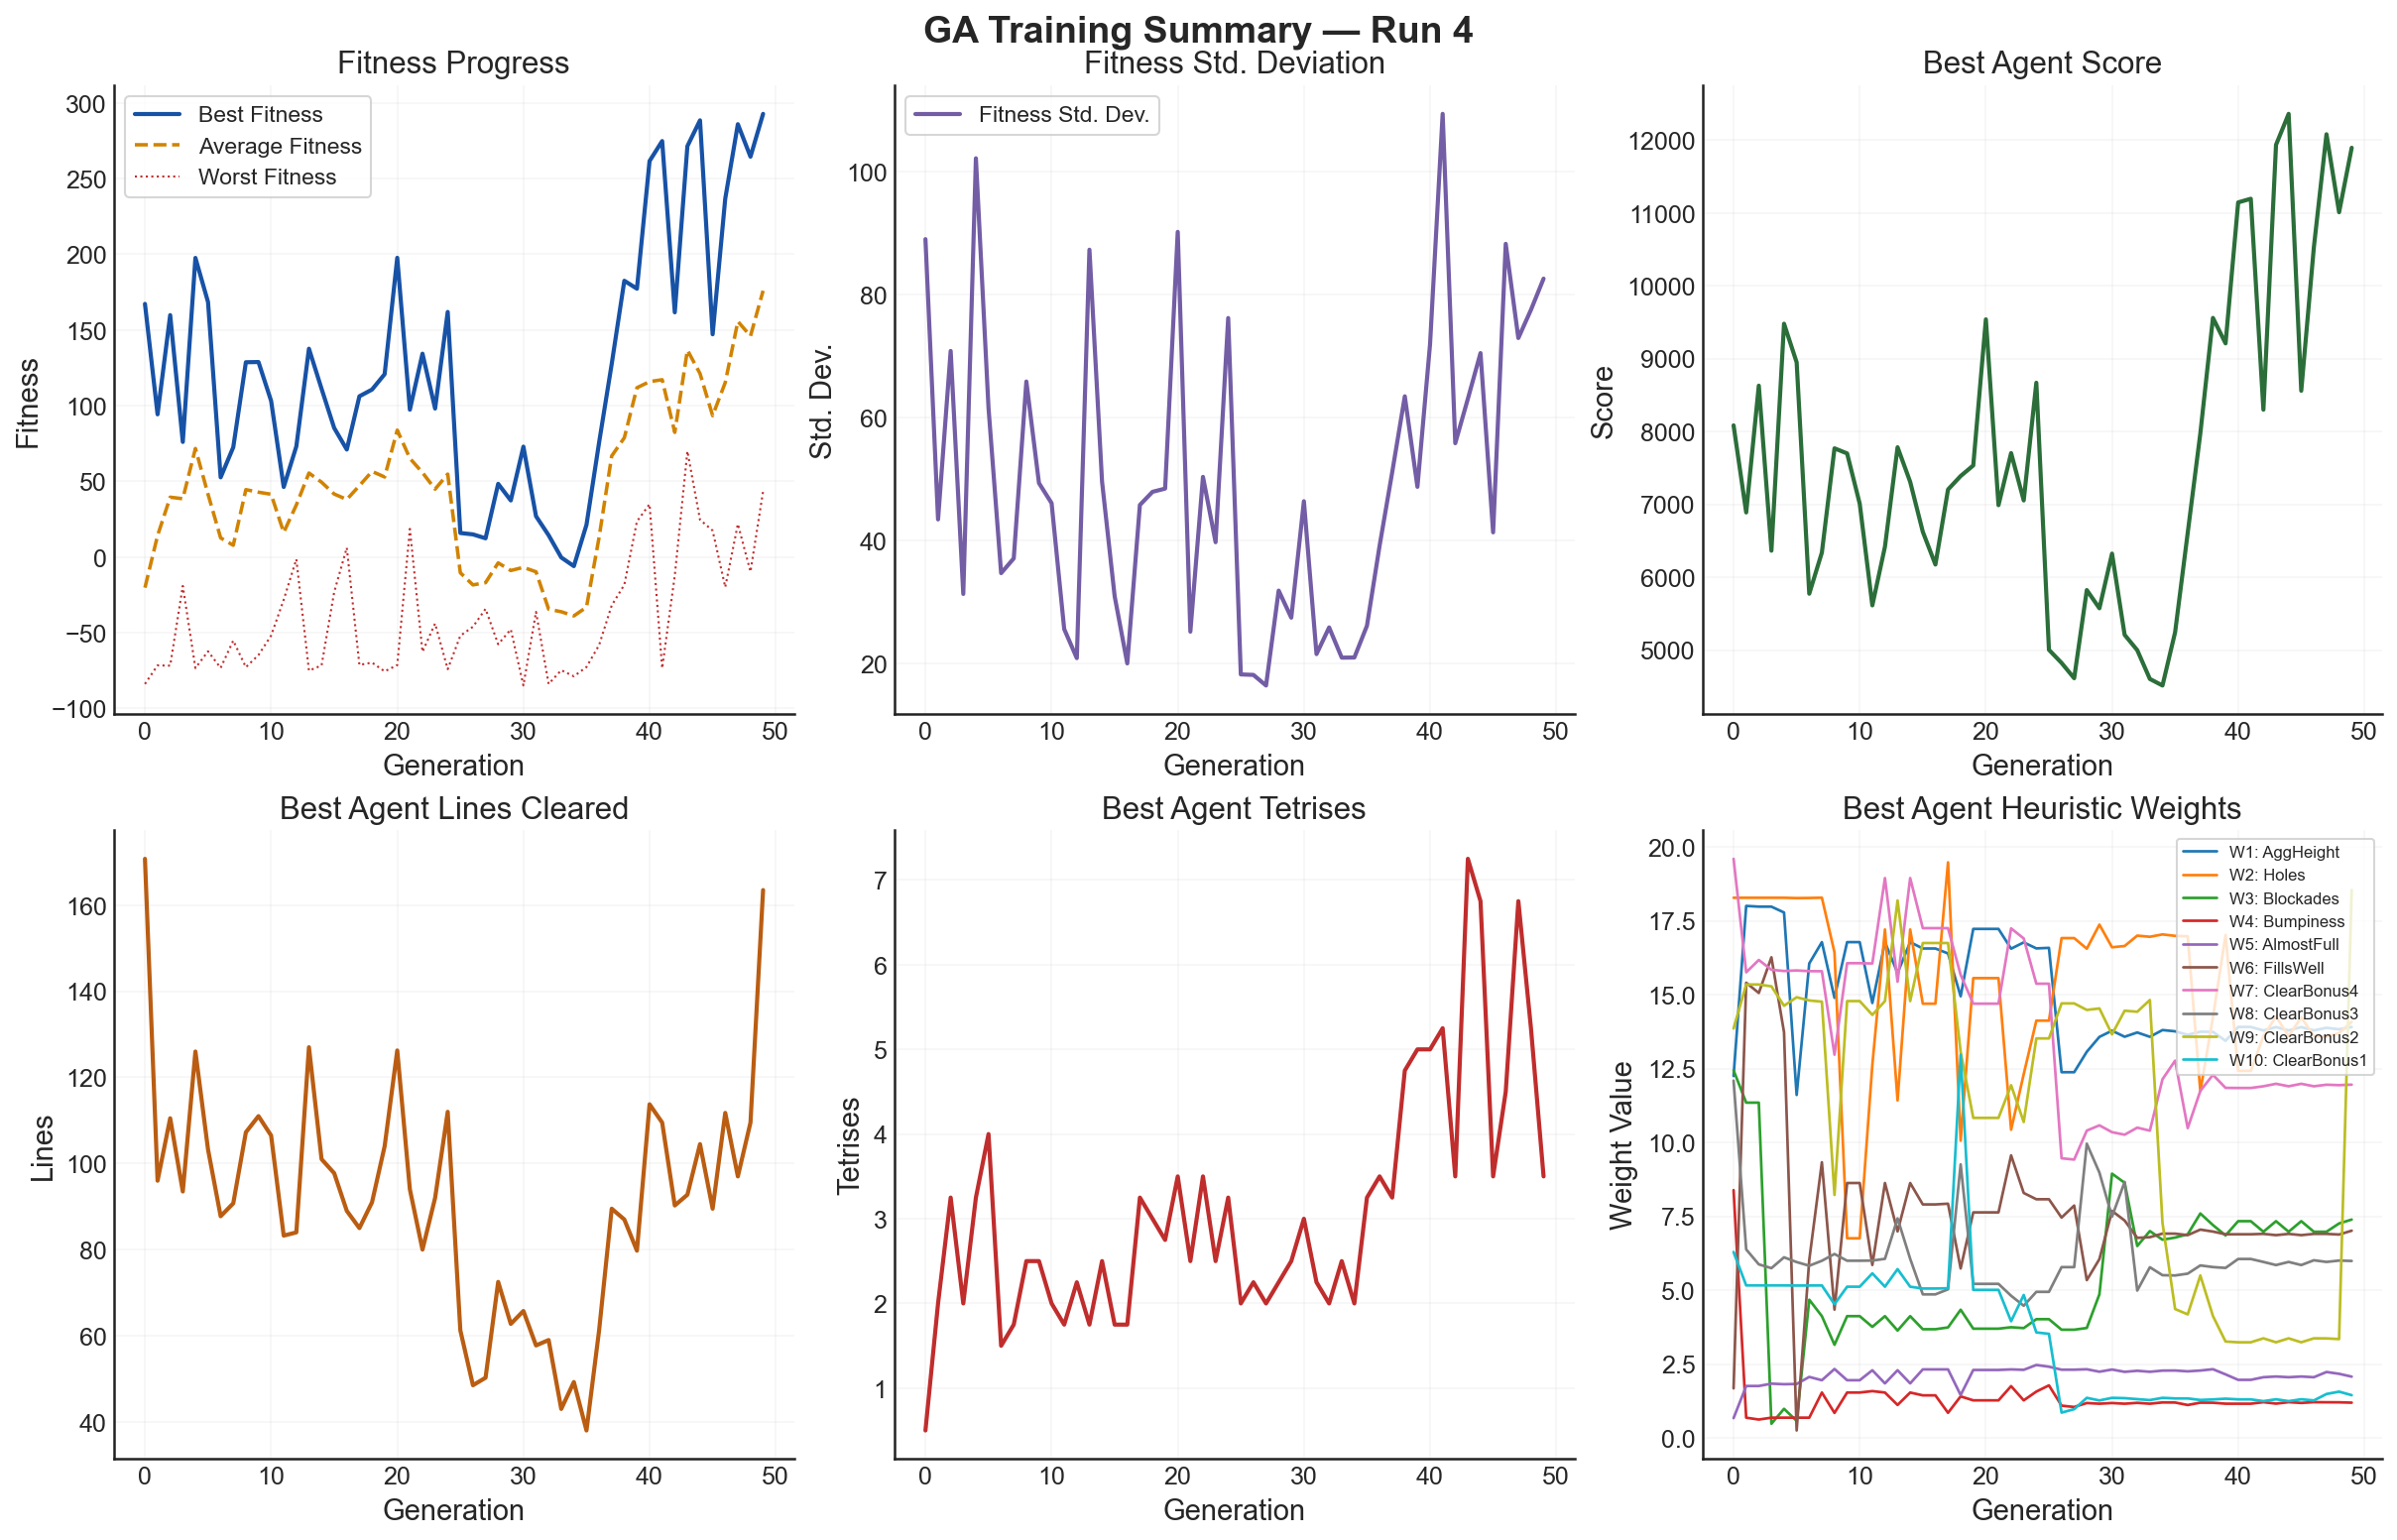

In [5]:
plot_ga_run("D:/Tetris-Project/results/GA/run_4/ga_log.csv", "Run 4")

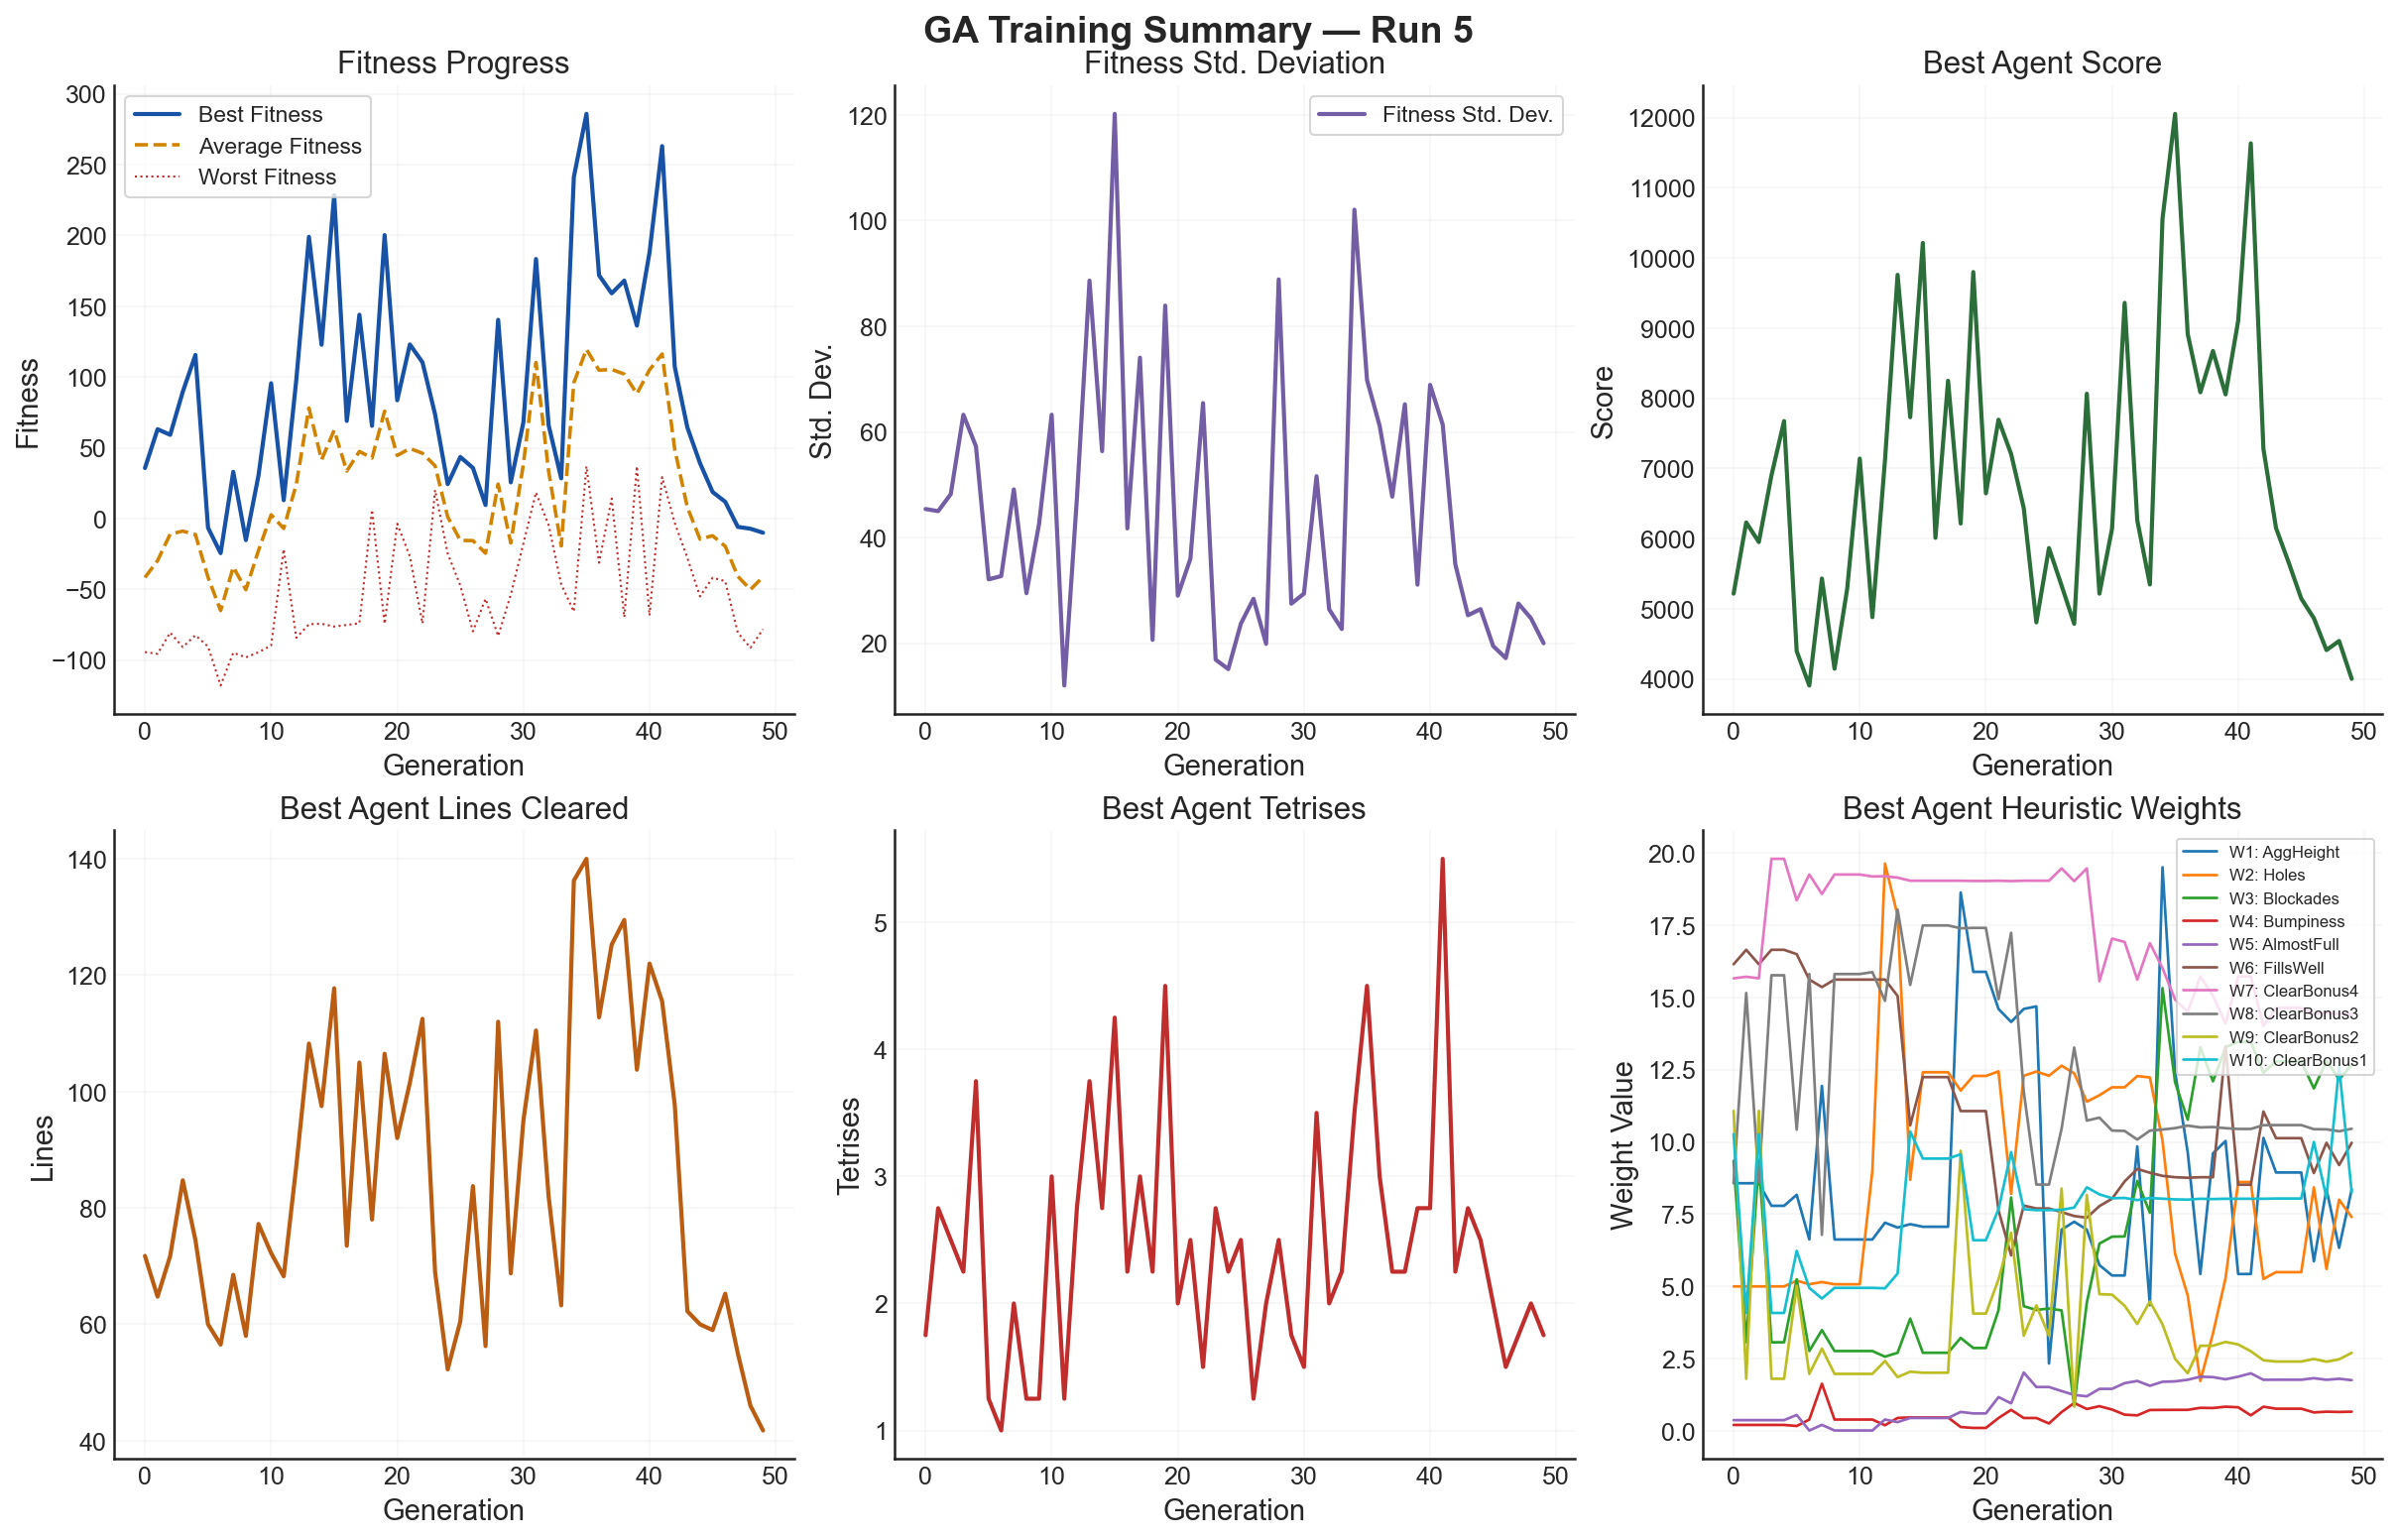

In [6]:
plot_ga_run("D:/Tetris-Project/results/GA/run_5/ga_log.csv", "Run 5")

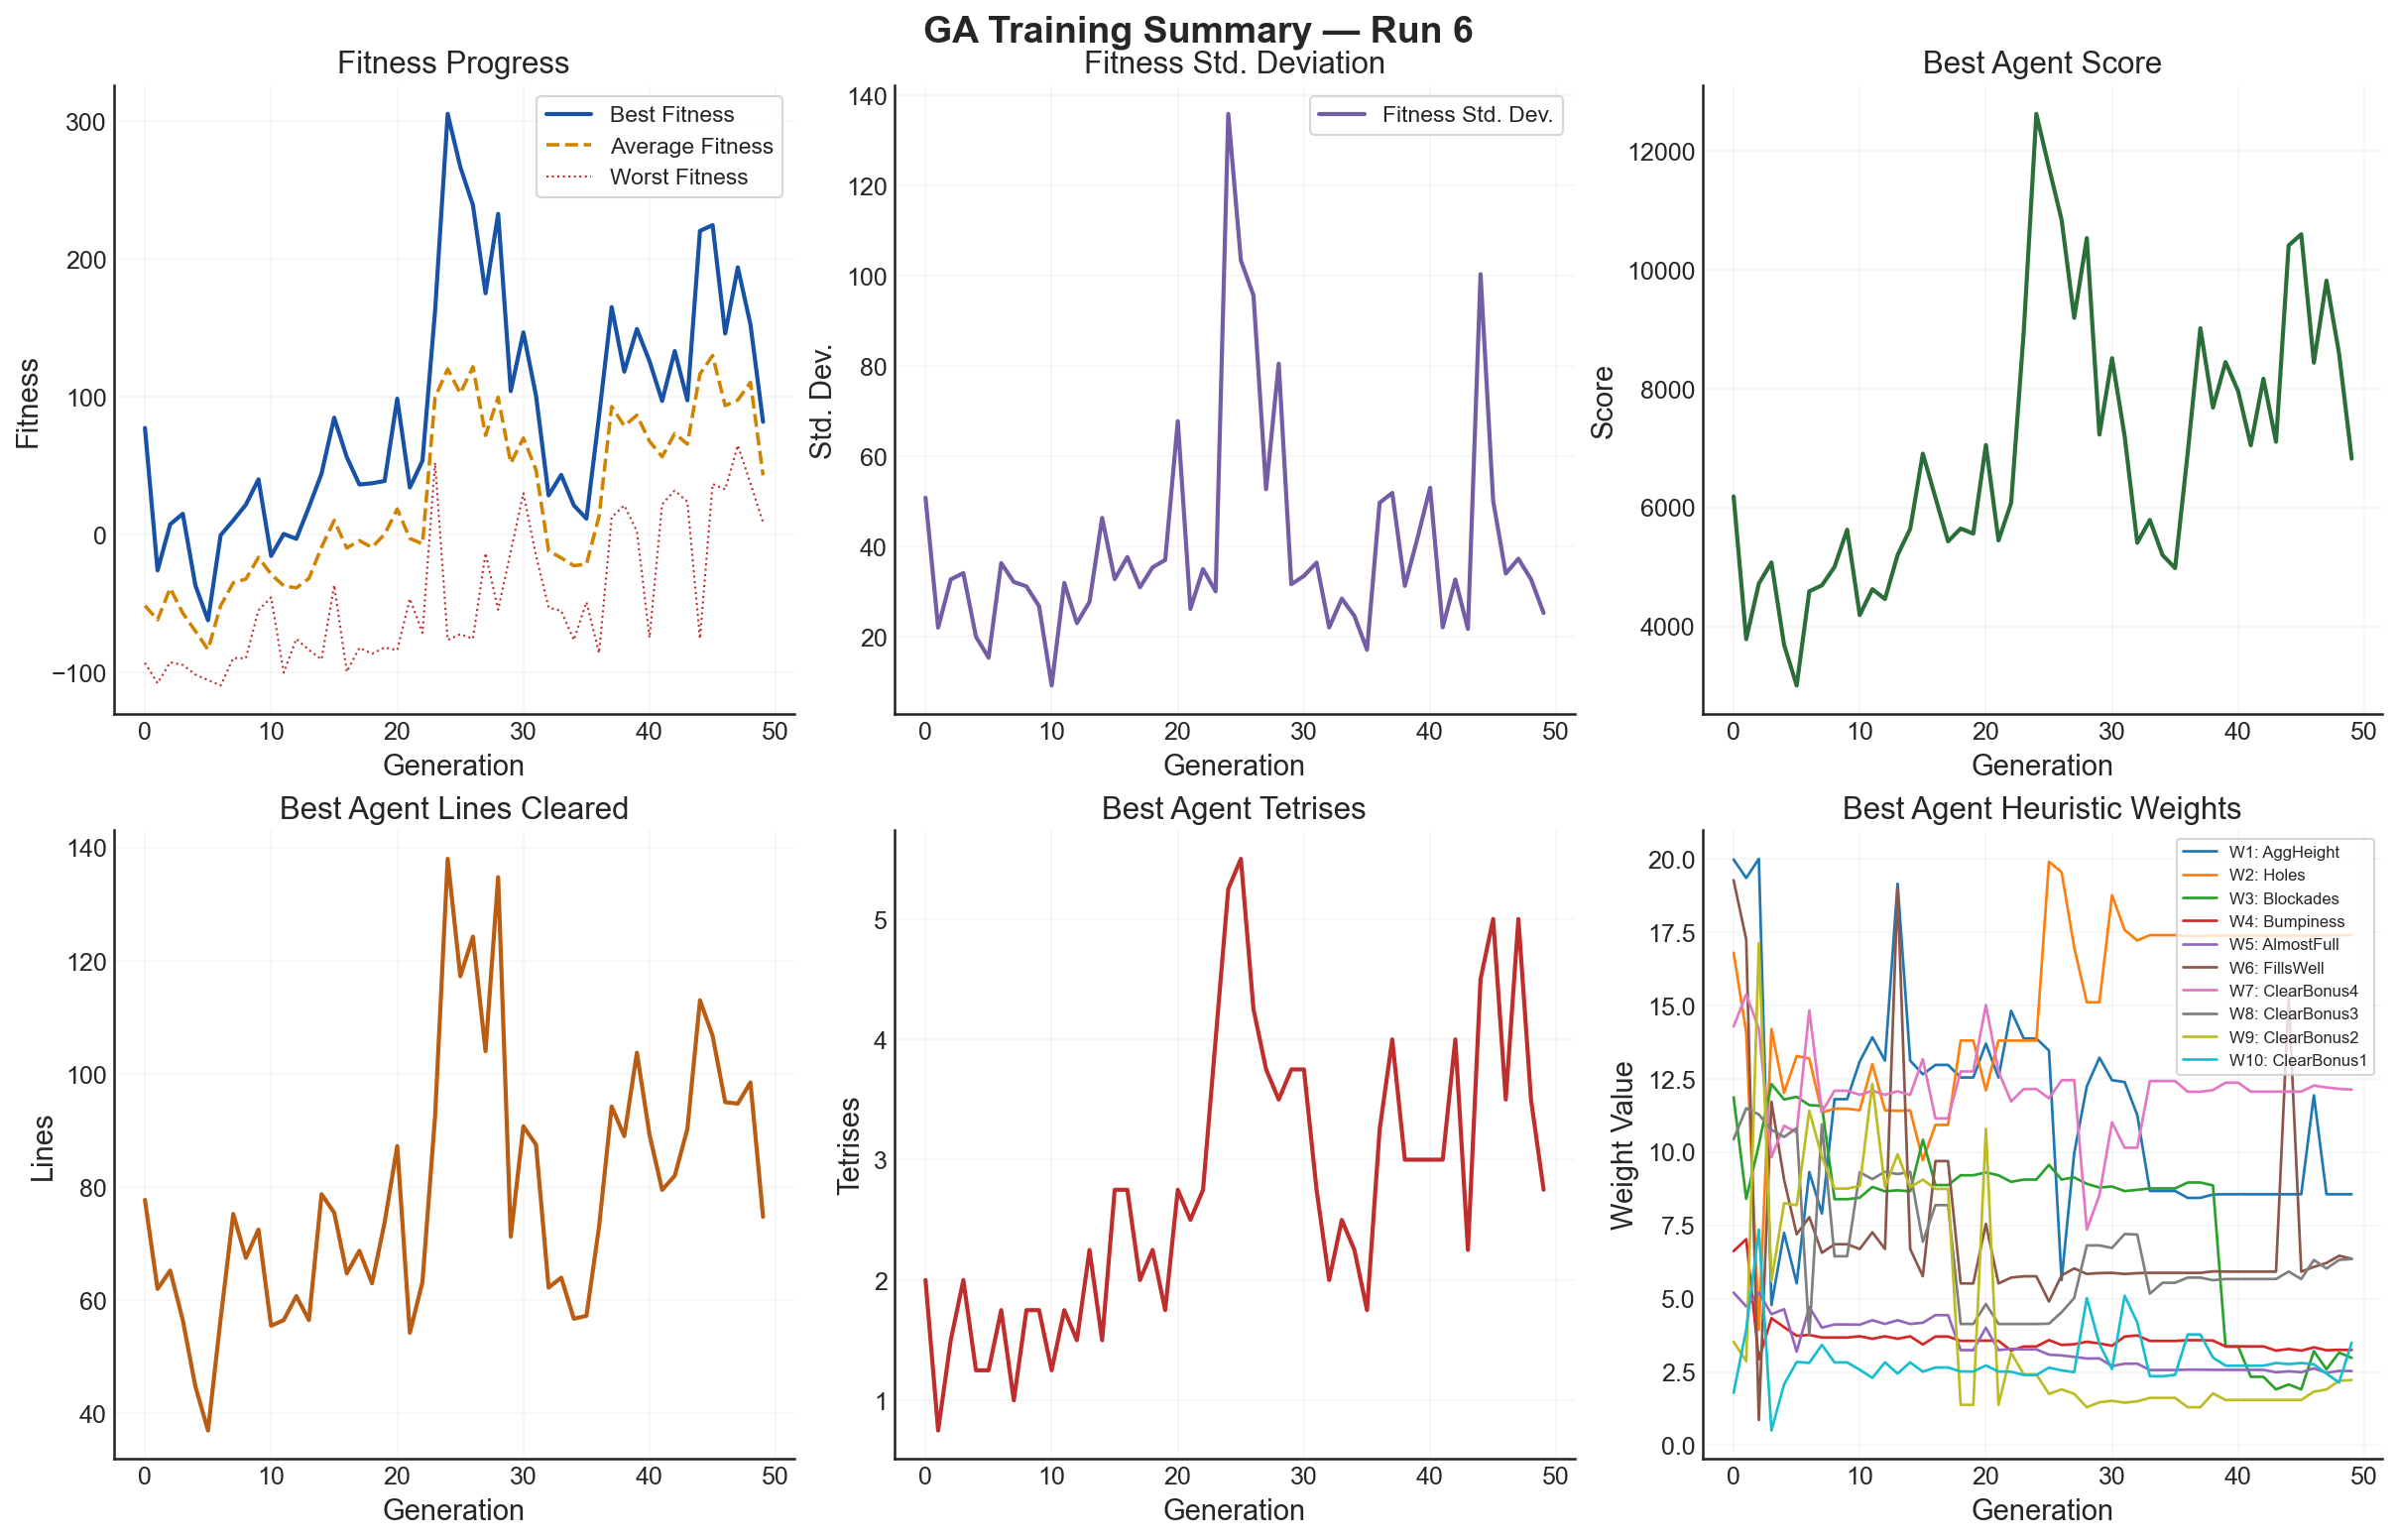

In [7]:
plot_ga_run("D:/Tetris-Project/results/GA/run_6/ga_log.csv", "Run 6")